In [1]:
%load_ext autoreload
#
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns

from amro import Fourier
from amro import AMROFitter
from amro import AMROLoader
from amro import AMROCleaner




# Clean the Raw AMRO for Loading

In [2]:

cleaner = AMROCleaner( datafile_type='.dat')#, verbose=True)
cleaner.clean_data_from_folder()
print(cleaner.get_experiment_labels())


Reading YbPdBi_ACTRot11_parallel.dat
Found 17 oscillations. Saved as ACTRot11_antisymmetrized.csv
Reading YbPdBi_ACTRot12_perp_108022.dat
Found 16 oscillations. Saved as ACTRot12_antisymmetrized.csv
['ACTRot11', 'ACTRot12']


C:\Users\jdcf5\Documents\Data Science Portfolio\Python\MSc Data Analyses\AMRO Fourier Transform and Fit\src\amro\data\cleaner.py:208: UserWarning: Default values detected for wire separation (1.0) or cross section (1.0). Note that this package expects measurements of resistivity, not resistance.
  warn(


# Load AMRO Data

Loading in partially pre-processed angle-resolved magnetoresistance oscillation (**AMRO**) data. The pre-processing consists of anti-symmetrizing the raw data taken from in the laboratory.

**AMRO** data is obtained by measuring the resistivity of a sample as it is rotated in a constant magnetic field. The changes in the resistivity during this rotation provide information relating to the **Fermi surface** of the material, which governs the behaviour of electrons during such measurements. The **Fermi surface** is a product of the quantum nature of the electrons, and its shape is primarily determined by the structure/arrangement of the material's constituent elements.

The Fermi surface is a surface of constant energy in the momentum space (**k-space**) of the electrons.

In [3]:
amro = AMROLoader('AMRO_combined_data')
project_data = amro.load_amro()

project_data.correct_geometry_scaling(experiment_label= 'ACTRot12', wire_sep= 0.01877, width=  0.09172, height = 0.08020)

# project_data.correct_geometry_scaling(experiment_label= 'ACTRot13', wire_sep= 0.0433, width=  0.1804, height = 0.112)

print(project_data.get_summary_statistics())

Loading : AMRO_combined_data
Experiment cross-section (0.007355943999999999) and wire sep (0.01877) do not appear to require scaling.
Set force_rescale to True to force rescaling.
{'n_experiments': 2, 'n_oscillations': 33, 'n_fourier_completed': 33, 'n_fits_completed': 33}


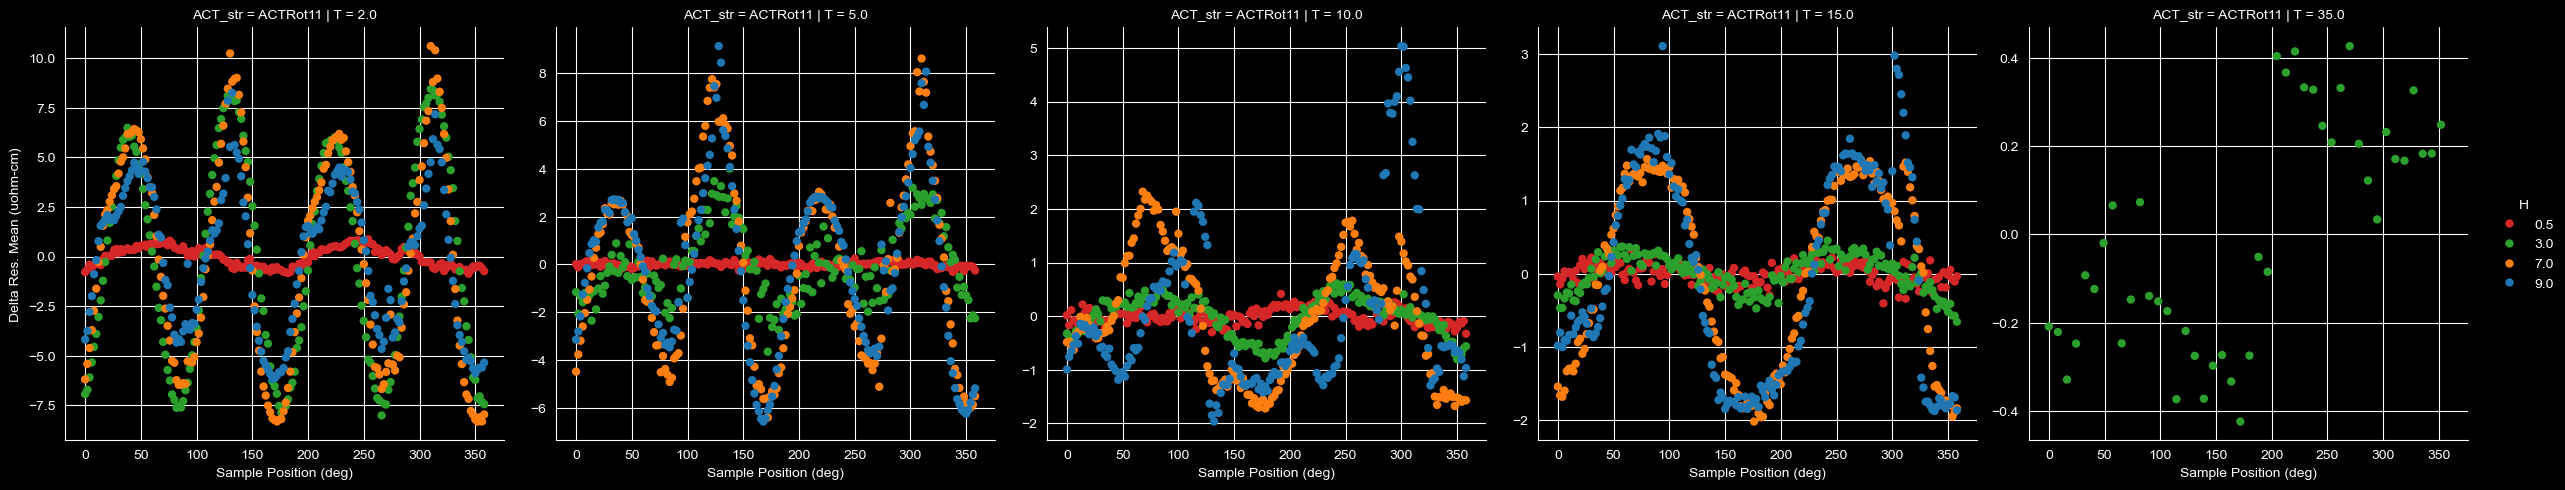

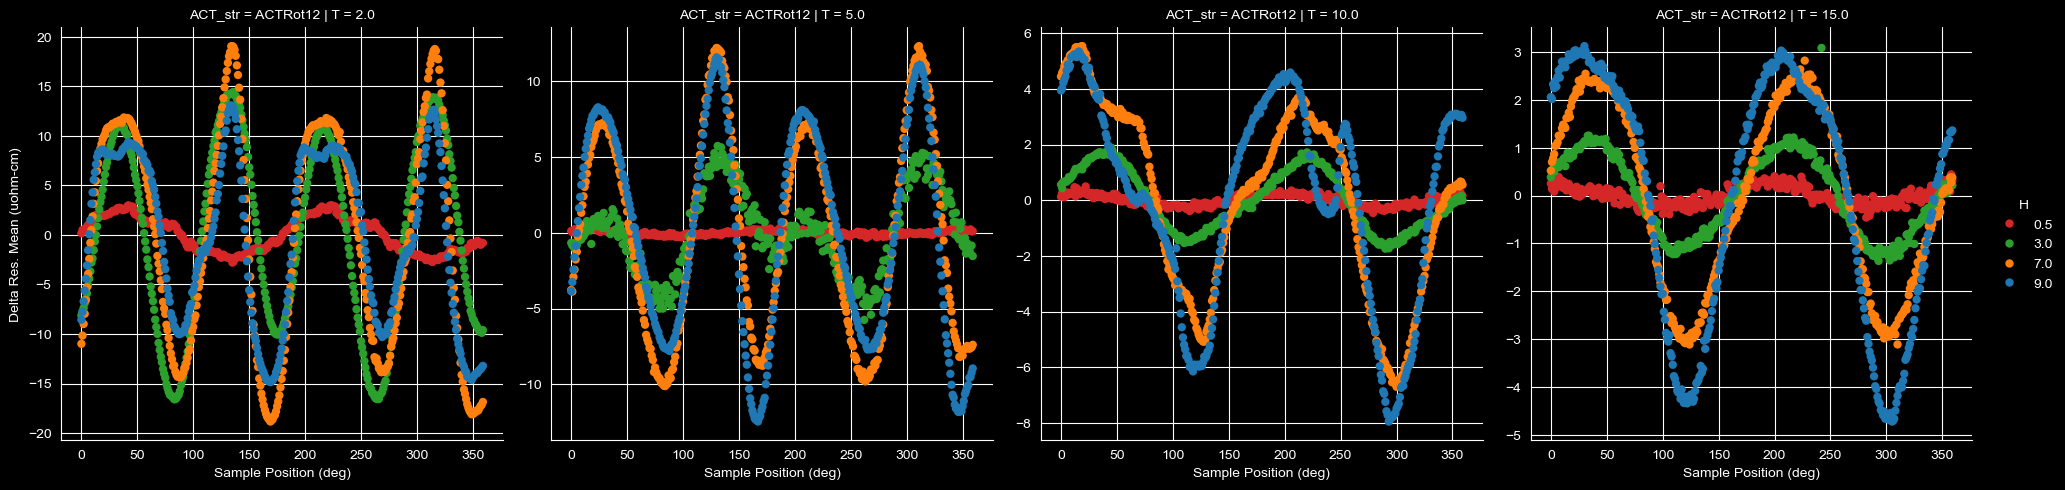

In [4]:
amro.quick_plot_amro()

# Fourier Transform

In order to determine good initial guesses for the sinusoidal fitting, I Fourier transform this data.

The advantage to using a Fourier transform for this analysis is that the results of a Fourier transform do not depend on the choice of fitting function. This reduces the influence of personal biases, and also improves the comparability of results between AMRO-based research publications. One downside is the difficulty in determining our measurement uncertainties, an important part of science. This is why I later fit the data with sinusoids.

Each wave created by the resistivity as the sample is rotated can be deconstructed into a sum of sinusoidal waves. I am interested in the strengths of these oscillations, as one can garner information about the Fermi surface structure.

NB: I don't want to use these as final results. By using these as an initial best guess for a regression, I can take noise into account and better quantify the uncertainties.


In [5]:
fourier = Fourier(project_data, 'AMRO_fourier')
fourier.fourier_transform_experiments()

print(project_data.get_summary_statistics())

Experiment_Object_ACTRot11_T35.0K_H3.0T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T15.0K_H0.5T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T15.0K_H3.0T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T15.0K_H7.0T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T15.0K_H9.0T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T10.0K_H0.5T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T10.0K_H3.0T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T10.0K_H7.0T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T10.0K_H9.0T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T5.0K_H0.5T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T5.0K_H3.0T already has a Fourier result. Skipping...
Experiment_Object_ACTRot11_T5.0K_H7.0T already has a Fourier result. Skipping...
Experiment_Object_A

# Sinusoidal Fits


## Fitting Function
We fit the AMRO data using a function of the form :

$\quad\quad\rho_{xx}(\theta) = \rho_0\left(1 + \sum_i a_i\sin(f_i\theta+\phi_i)\right)$

where $\theta$ is the angle of sample rotation, $\rho_0$ is the mean resistivity, $f_i$ is the value of the symmetry (i.e. $f_2=2$ for the 2-fold symmetry), $a_i$ is the amplitude of the $i$-th symmetry and $\phi_i$ is it's phase. We are primarily interested in the values of $a_i$, which correlate to the dominant rotational symmetry of the Fermi surface. Values of $\phi_i$ correspond to a rotation in k-space.

As initial guesses for $a_i$, we use the results of the previous Fourier transforms.

In [6]:
fitter = AMROFitter(project_data,
                    save_name='amro_fits',
                    if_save_file_exists_overwrite=True,
                    min_amp_ratio= 0.075, #1,
                    max_freq=8, # 12,
                    force_four_and_two_sym=True,
                    verbose=False)
for ACT_label in ['ACTRot11', 'ACTRot12']:
    fitter.fit_act_experiment(act_label=ACT_label)


Fitting ACTRot11_T35.0K_H3.0T.
Fitting ACTRot11_T15.0K_H0.5T.
Fitting ACTRot11_T15.0K_H3.0T.
Fitting ACTRot11_T15.0K_H7.0T.
Fitting ACTRot11_T15.0K_H9.0T.
Fitting ACTRot11_T10.0K_H0.5T.
Fitting ACTRot11_T10.0K_H3.0T.
Fitting ACTRot11_T10.0K_H7.0T.
Attempting re-fit with infinite bounds for phase.
Fit was improved.
Continuing...
Fitting ACTRot11_T10.0K_H9.0T.
Attempting re-fit with infinite bounds for phase.
Fit was improved.
Continuing...
Fitting ACTRot11_T5.0K_H0.5T.
Fitting ACTRot11_T5.0K_H3.0T.
Fitting ACTRot11_T5.0K_H7.0T.
Fitting ACTRot11_T5.0K_H9.0T.
Fitting ACTRot11_T2.0K_H0.5T.
Fitting ACTRot11_T2.0K_H3.0T.
Fitting ACTRot11_T2.0K_H7.0T.
Fitting ACTRot11_T2.0K_H9.0T.
Total fitted: 17
Saving to CSV.
Pickling project data.
Fitting ACTRot12_T15.0K_H0.5T.
Attempting re-fit with infinite bounds for phase.
Fit was improved.
Continuing...
Fitting ACTRot12_T15.0K_H3.0T.
Fitting ACTRot12_T15.0K_H7.0T.
Fitting ACTRot12_T15.0K_H9.0T.
Fitting ACTRot12_T10.0K_H0.5T.
Attempting re-fit with in

## Check the Fit Results

Saved ACTRot11_figure_amro_fits_ratio_0.075_maxf_8_.pdf


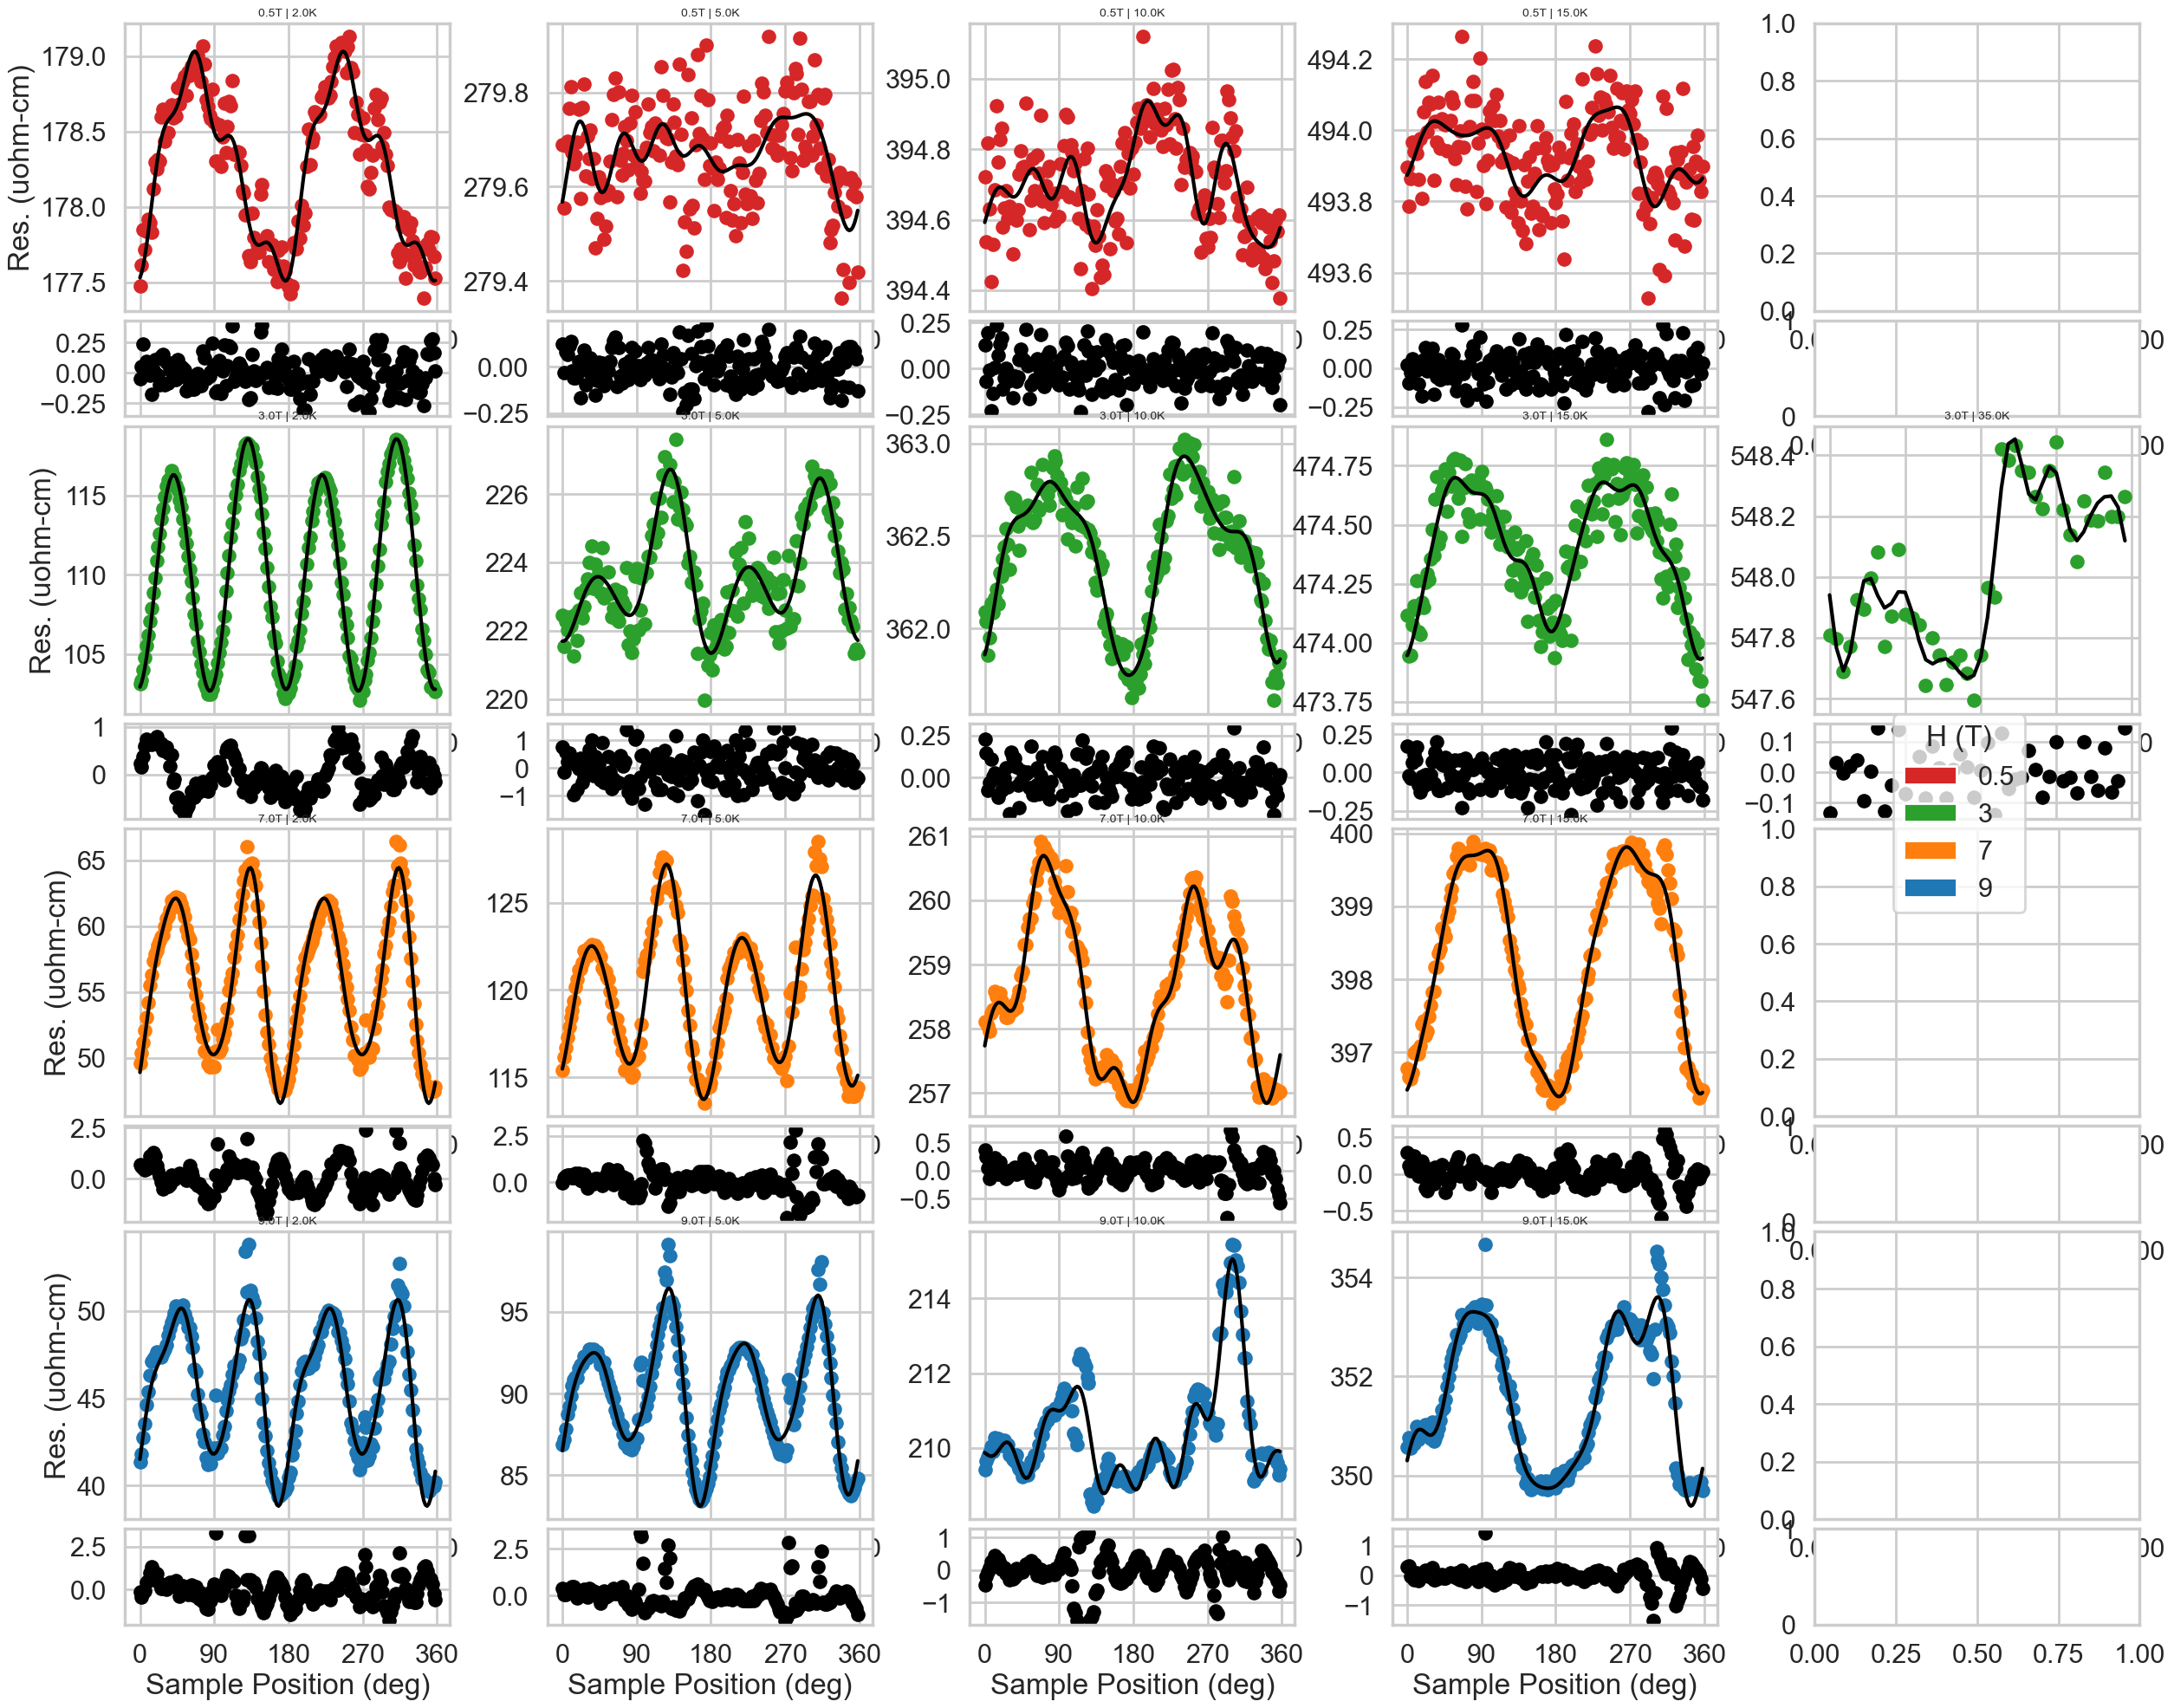

Saved ACTRot12_figure_amro_fits_ratio_0.075_maxf_8_.pdf


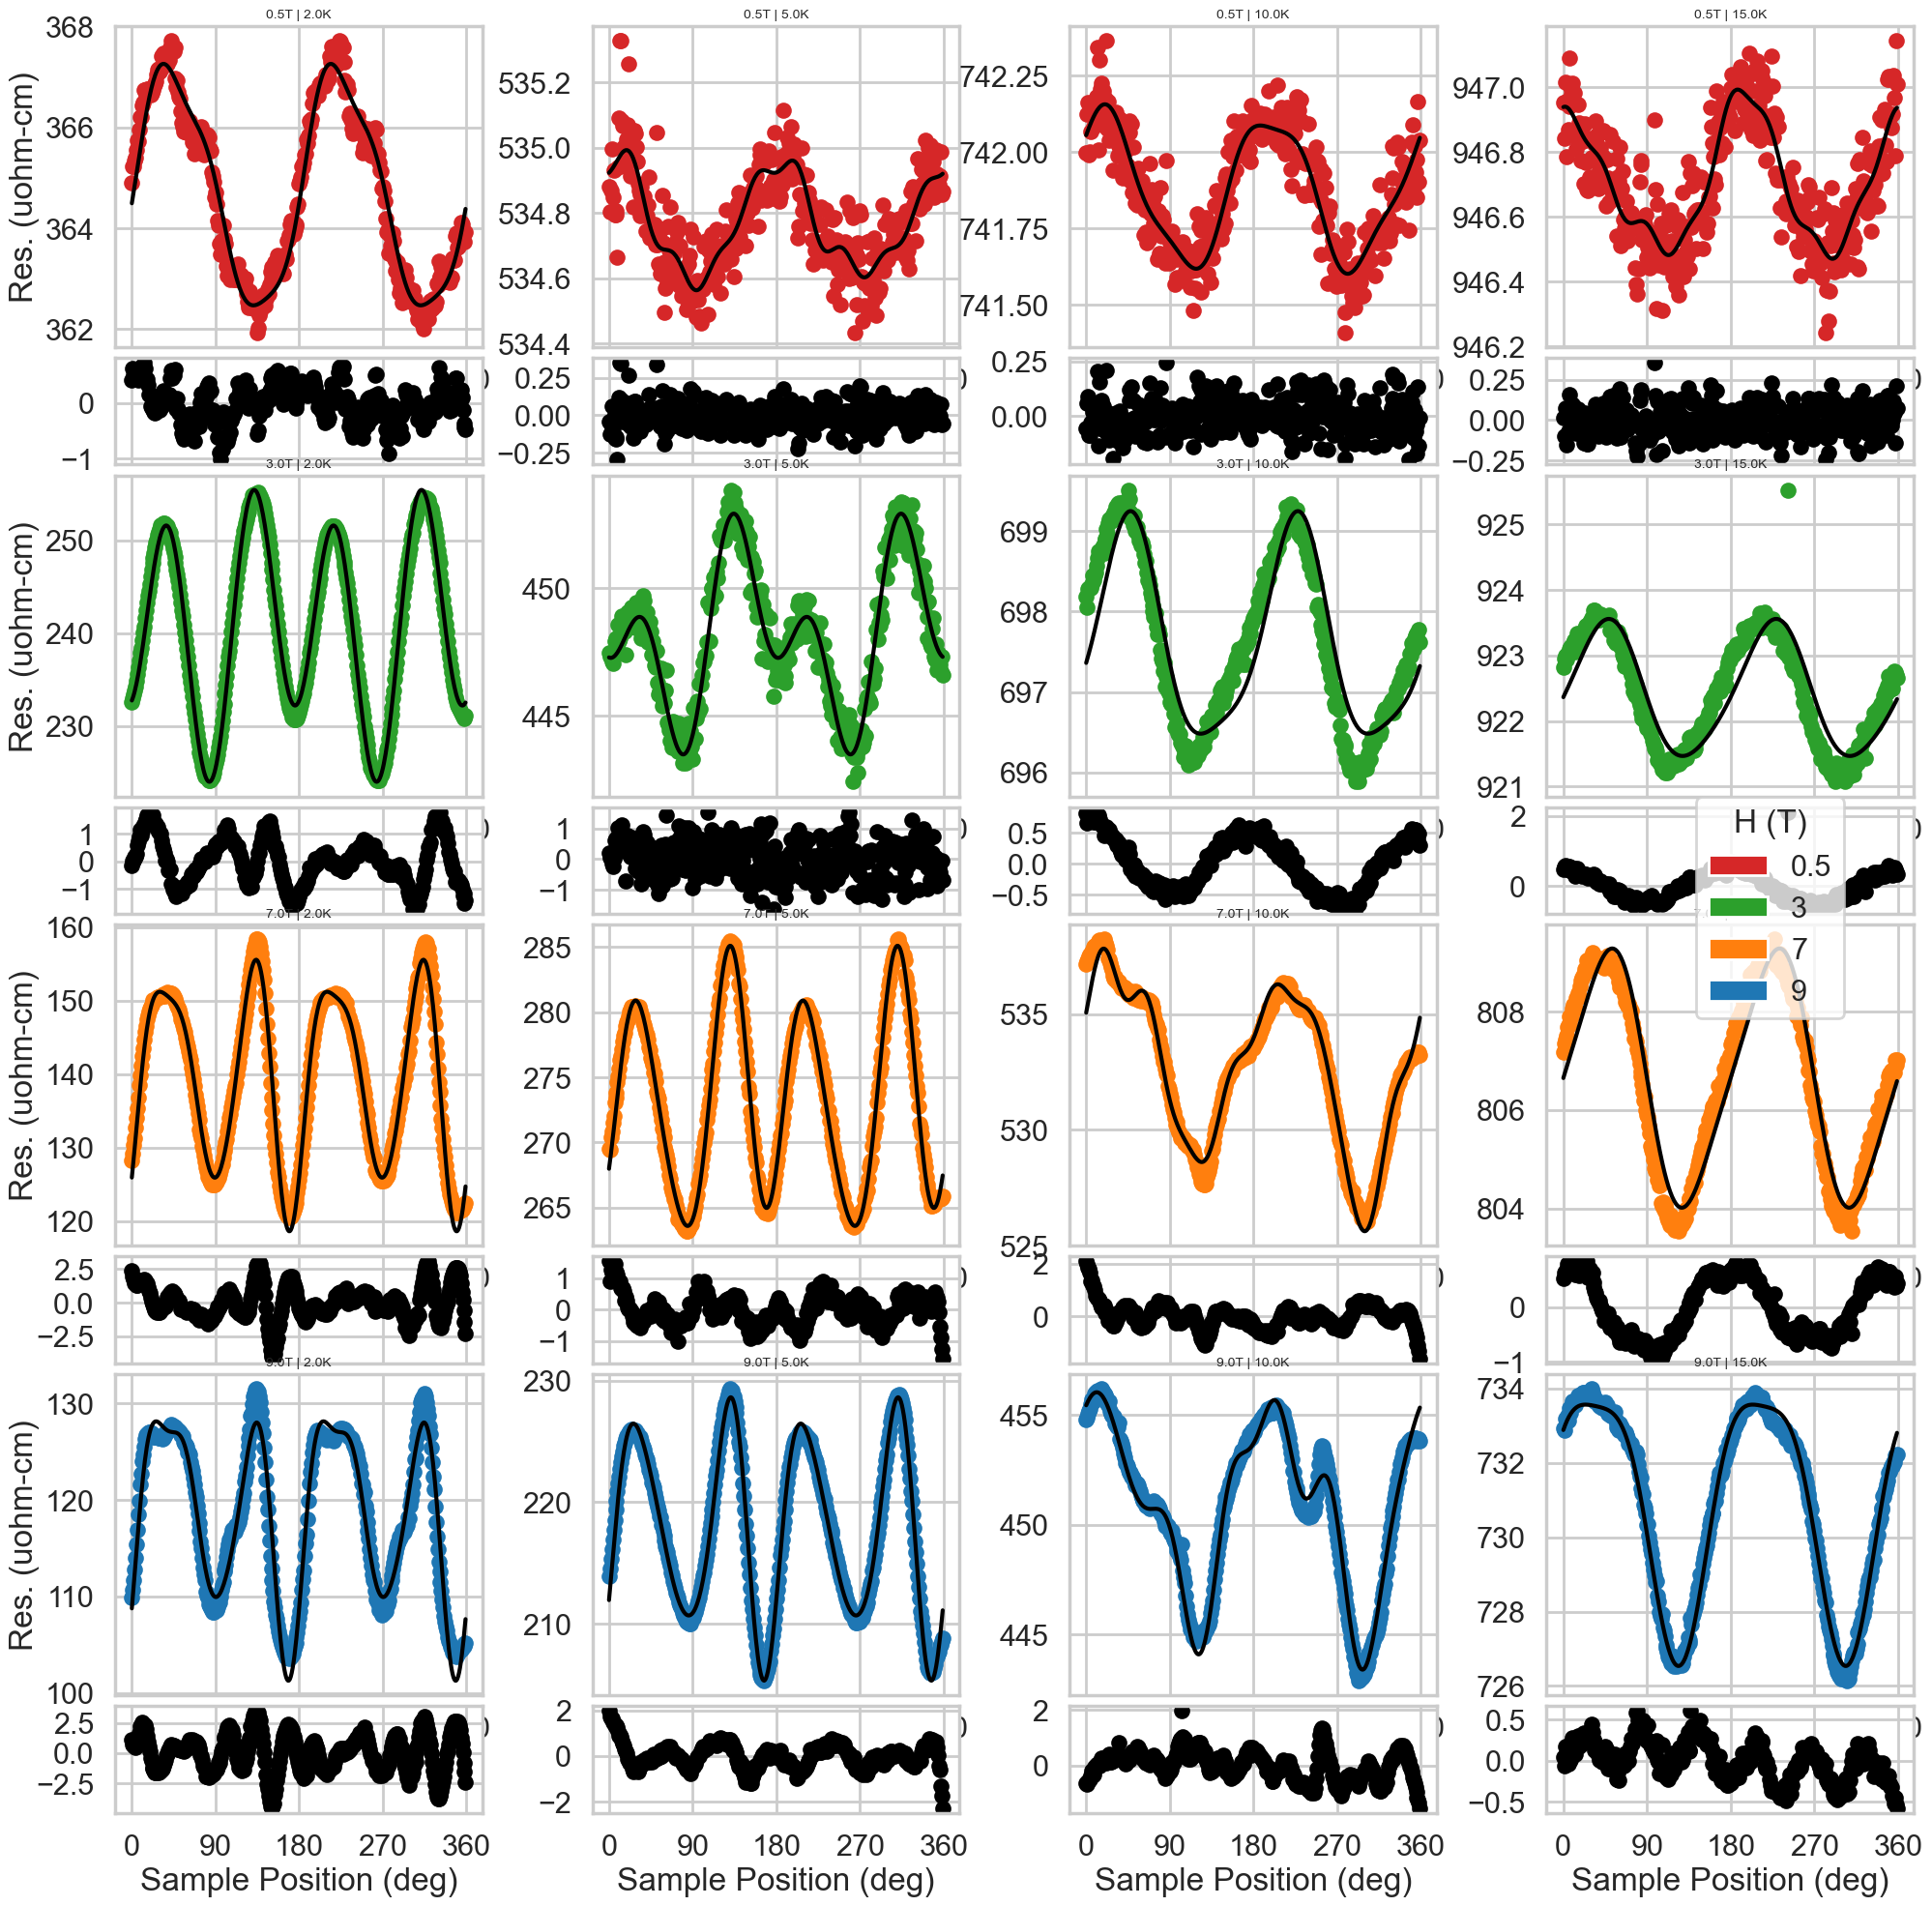

In [7]:
for ACT_label in ['ACTRot11', 'ACTRot12']:
    sns.set_context('poster')
    sns.set_style("whitegrid")
    fig, ax = fitter.plot_fits_with_residuals_uohm(exp_choice=ACT_label ,save_fig=True)

    plt.show()

## Bad Fits Check

In [8]:
for ACT_label in ['ACTRot11', 'ACTRot12']:
    fig, axes = fitter.plot_bad_fits(exp_choice=ACT_label)

No fits failed.
No fits failed.


# Save Fit Parameters